In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [3]:
df_train = pd.read_csv('/kaggle/input/amex-default-prediction/train_data.csv', nrows = 200000)
#df_test = pd.read_csv('/kaggle/input/amex-default-prediction/test_data.csv', nrows = 200000)
df_train_labels = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv', nrows = 200000)
#df_submission = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')

In [4]:
df_train = pd.merge(df_train, df_train_labels, how="inner", on=["customer_ID"])

In [5]:
df_train.head()

customer_ID         S_2       P_2  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09  0.938469   
1  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07  0.936665   
2  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28  0.954180   
3  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13  0.960384   
4  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16  0.947248   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  ...  \
0  0.001733  0.008724  1.006838  0.009228  0.124035  0.008771  0.004709  ...   
1  0.005775  0.004923  1.000653  0.006151  0.126750  0.000798  0.002714  ...   
2  0.091505  0.021655  1.009672  0.006815  0.123977  0.007598  0.009423  ...   
3  0.002455  0.013683  1.002700  0.001373  0.117169  0.000685  0.005531  ...   
4  0.002483  0.015193  1.000727  0.007605  0.117325  0.004653  0.009312  ...   

   D_137  D_138     D_139     D_140     D_141  D_142     D_143     D_144  \
0    NaN    NaN  0.002427  0.003706  0.003818    NaN  0.000569  0.000610   
1    NaN    NaN  0.003954  0.003167  0.005032    NaN  0.009576  0.005492   
2    NaN    NaN  0.003269  0.007329  0.000427    NaN  0.003429  0.006986   
3    NaN    NaN  0.006117  0.004516  0.003200    NaN  0.008419  0.006527   
4    NaN    NaN  0.003671  0.004946  0.008889    NaN  0.001670  0.008126   

      D_145  target  
0  0.002674       0  
1  0.009217       0  
2  0.002603       0  
3  0.009600       0  
4  0.009827       0  

[5 rows x 191 columns]

In [6]:
df_train.tail()

customer_ID         S_2  \
199995  09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...  2017-08-28   
199996  09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...  2017-09-15   
199997  09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...  2017-10-10   
199998  09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...  2017-11-16   
199999  09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...  2017-12-15   

             P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
199995  0.539011  0.002428  0.006173  1.006607  0.007721  0.155389  0.002317   
199996  0.545751  0.062144  0.014536  0.816225  0.009416  0.145824  0.007354   
199997  0.579735  0.009152  0.010878  0.815024  0.005641  0.149669  0.001961   
199998  0.577626  0.090158  0.013903  1.008488  0.007109  0.153834  0.004685   
199999  0.655403  0.002060  0.022364  1.007560  0.006147  0.151334  0.009964   

             B_3  ...  D_137  D_138     D_139     D_140     D_141  D_142  \
199995  0.014583  ...    NaN    NaN  0.001474  0.005978  0.003926    NaN   
199996  0.011436  ...    NaN    NaN  0.003072  0.008800  0.000814    NaN   
199997  0.008332  ...    NaN    NaN  0.006708  0.007236  0.007473    NaN   
199998  0.010484  ...    NaN    NaN  0.003593  0.005189  0.005273    NaN   
199999  0.003983  ...    NaN    NaN  0.003830  0.007001  0.005250    NaN   

           D_143     D_144     D_145  target  
199995  0.007297  0.006689  0.009181       0  
199996  0.003730  0.005946  0.006949       0  
199997  0.004778  0.000594  0.001202       0  
199998  0.007717  0.008678  0.005638       0  
199999  0.008395  0.000767  0.006576       0  

[5 rows x 191 columns]

In [7]:
df_train.shape

(200000, 191)

In [8]:
df_train.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=191)

In [9]:
df_train.duplicated().sum()

0

In [10]:
df_train.isnull().sum()

customer_ID         0
S_2                 0
P_2              1542
D_39                0
B_1                 0
                ...  
D_142          165644
D_143            3503
D_144            1433
D_145            3503
target              0
Length: 191, dtype: int64

In [11]:
nan_cols = [i for i in df_train.columns if df_train[i].isnull().any()]

In [12]:
nan_cols

['P_2',
 'B_2',
 'S_3',
 'D_41',
 'B_3',
 'D_42',
 'D_43',
 'D_44',
 'D_45',
 'D_46',
 'D_48',
 'D_49',
 'B_6',
 'B_8',
 'D_50',
 'D_52',
 'P_3',
 'D_53',
 'D_54',
 'S_7',
 'D_55',
 'D_56',
 'B_13',
 'S_9',
 'D_59',
 'D_61',
 'B_15',
 'D_62',
 'D_64',
 'B_16',
 'B_17',
 'B_19',
 'D_66',
 'B_20',
 'D_68',
 'D_69',
 'B_22',
 'D_70',
 'D_72',
 'D_73',
 'D_74',
 'D_76',
 'D_77',
 'B_25',
 'B_26',
 'D_78',
 'D_79',
 'R_9',
 'D_80',
 'B_27',
 'D_81',
 'D_82',
 'R_12',
 'D_83',
 'D_84',
 'B_29',
 'B_30',
 'D_87',
 'D_88',
 'R_20',
 'B_33',
 'D_89',
 'D_91',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'D_102',
 'D_103',
 'D_104',
 'D_105',
 'D_106',
 'D_107',
 'B_37',
 'R_26',
 'R_27',
 'B_38',
 'D_108',
 'D_109',
 'D_110',
 'D_111',
 'B_39',
 'D_112',
 'B_40',
 'S_27',
 'D_113',
 'D_114',
 'D_115',
 'D_116',
 'D_117',
 'D_118',
 'D_119',
 'D_120',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_126',
 'D_128',
 'D_129',
 'B_41',
 'B_42',
 'D_130',
 'D_131',
 'D_132',
 'D_133',
 'D_134

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Columns: 191 entries, customer_ID to target
dtypes: float64(185), int64(2), object(4)
memory usage: 293.0+ MB


In [14]:
df_train.describe()

P_2          D_39            B_1            B_2  \
count  198458.000000  2.000000e+05  200000.000000  199928.000000   
mean        0.653527  1.534126e-01       0.125356       0.616971   
std         0.246135  2.723813e-01       0.213396       0.402275   
min        -0.383019  3.892609e-07      -0.899396       0.000003   
25%         0.476334  4.541390e-03       0.008858       0.100550   
50%         0.691541  9.066380e-03       0.031935       0.814164   
75%         0.863455  2.360171e-01       0.129569       1.002240   
max         1.009998  5.331360e+00       1.324053       1.010000   

                R_1            S_3          D_41           B_3          D_42  \
count  2.000000e+05  162335.000000  1.999280e+05  1.999280e+05  29193.000000   
mean   8.121541e-02       0.227386  6.221769e-02  1.343925e-01      0.181170   
std    2.309947e-01       0.197101  2.081621e-01  2.348492e-01      0.216851   
min    2.962930e-08      -0.254707  5.627163e-08  1.042180e-07     -0.000219   
25%    2.899612e-03       0.127432  2.897833e-03  5.290730e-03      0.039449   
50%    5.792558e-03       0.164248  5.768750e-03  9.872834e-03      0.120749   
75%    8.684554e-03       0.260202  8.652639e-03  1.635911e-01      0.250728   
max    2.507711e+00       2.918675  6.798167e+00  1.625262e+00      3.252056   

               D_43  ...         D_137        D_138         D_139  \
count  1.399420e+05  ...  7.186000e+03  7186.000000  1.964970e+05   
mean   1.560354e-01  ...  1.424359e-02     0.162349  1.798358e-01   
std    2.169740e-01  ...  9.543979e-02     0.258647  3.798505e-01   
min    8.705647e-07  ...  4.129697e-08     0.000002  7.139375e-08   
25%    4.235285e-02  ...  2.589397e-03     0.003541  3.018427e-03   
50%    8.828850e-02  ...  5.141117e-03     0.007028  6.041458e-03   
75%    1.850985e-01  ...  7.667529e-03     0.501621  9.096570e-03   
max    9.089694e+00  ...  1.009913e+00     1.509486  1.010000e+00   

              D_140         D_141         D_142         D_143         D_144  \
count  1.985810e+05  1.964970e+05  34356.000000  1.964970e+05  1.985670e+05   
mean   2.622542e-02  1.653822e-01      0.392596  1.797362e-01  5.339187e-02   
std    1.441568e-01  3.490555e-01      0.238923  3.797464e-01  1.851044e-01   
min    5.277736e-08  5.642931e-08     -0.014441  1.653580e-08  1.161969e-07   
25%    2.551375e-03  3.033245e-03      0.196174  3.034162e-03  2.752575e-03   
50%    5.109293e-03  6.062756e-03      0.382038  6.077791e-03  5.499113e-03   
75%    7.658175e-03  9.094362e-03      0.566102  9.088631e-03  8.267479e-03   
max    1.009994e+00  1.174753e+00      1.751388  1.010000e+00  1.343284e+00   

              D_145         target  
count  1.964970e+05  200000.000000  
mean   6.179908e-02       0.253395  
std    1.901802e-01       0.434956  
min    3.397747e-08       0.000000  
25%    3.027842e-03       0.000000  
50%    6.059988e-03       0.000000  
75%    9.093526e-03       1.000000  
max    4.282032e+00       1.000000  

[8 rows x 187 columns]

In [15]:
df_train.nunique()

customer_ID     16576
S_2               396
P_2            198458
D_39           200000
B_1            200000
                ...  
D_142           34356
D_143          196497
D_144          198567
D_145          196497
target              2
Length: 191, dtype: int64

In [16]:
cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df_train_cat = df_train[['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']]

In [19]:
for i in df_train_cat.columns:
    print(i)
    print(df_train_cat[i].unique())
    print(df_train_cat[i].value_counts())
    print('\n')

B_30
[ 0.  2.  1. nan]
0.0    169651
1.0     28195
2.0      2082
Name: B_30, dtype: int64


B_38
[ 2.  1.  3.  5.  6.  7.  4. nan]
2.0    69185
3.0    45557
1.0    42290
5.0    16264
4.0    10948
7.0     9821
6.0     5863
Name: B_38, dtype: int64


D_114
[ 1.  0. nan]
1.0    119921
0.0     73734
Name: D_114, dtype: int64


D_116
[ 0. nan  1.]
0.0    193429
1.0       226
Name: D_116, dtype: int64


D_117
[ 4. -1.  6.  2.  1. nan  3.  5.]
-1.0    52208
 3.0    41808
 4.0    41322
 2.0    24095
 5.0    17049
 6.0    12774
 1.0     4399
Name: D_117, dtype: int64


D_120
[ 0.  1. nan]
0.0    170250
1.0     23405
Name: D_120, dtype: int64


D_126
[ 1. nan  0. -1.]
 1.0    154085
 0.0     32515
-1.0      9175
Name: D_126, dtype: int64


D_63
['CR' 'CO' 'CL' 'XZ' 'XM' 'XL']
CO    148773
CR     33751
CL     15991
XZ       925
XM       309
XL       251
Name: D_63, dtype: int64


D_64
['O' 'R' nan 'U' '-1']
O     105870
U      55177
R      29601
-1      1312
Name: D_64, dtype: int64


D_66
[nan  

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
sum(df_train.isna().sum())

5810554

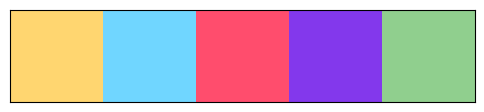

In [22]:
custom_colors = ["#ffd670","#70d6ff","#ff4d6d","#8338ec","#90cf8e"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

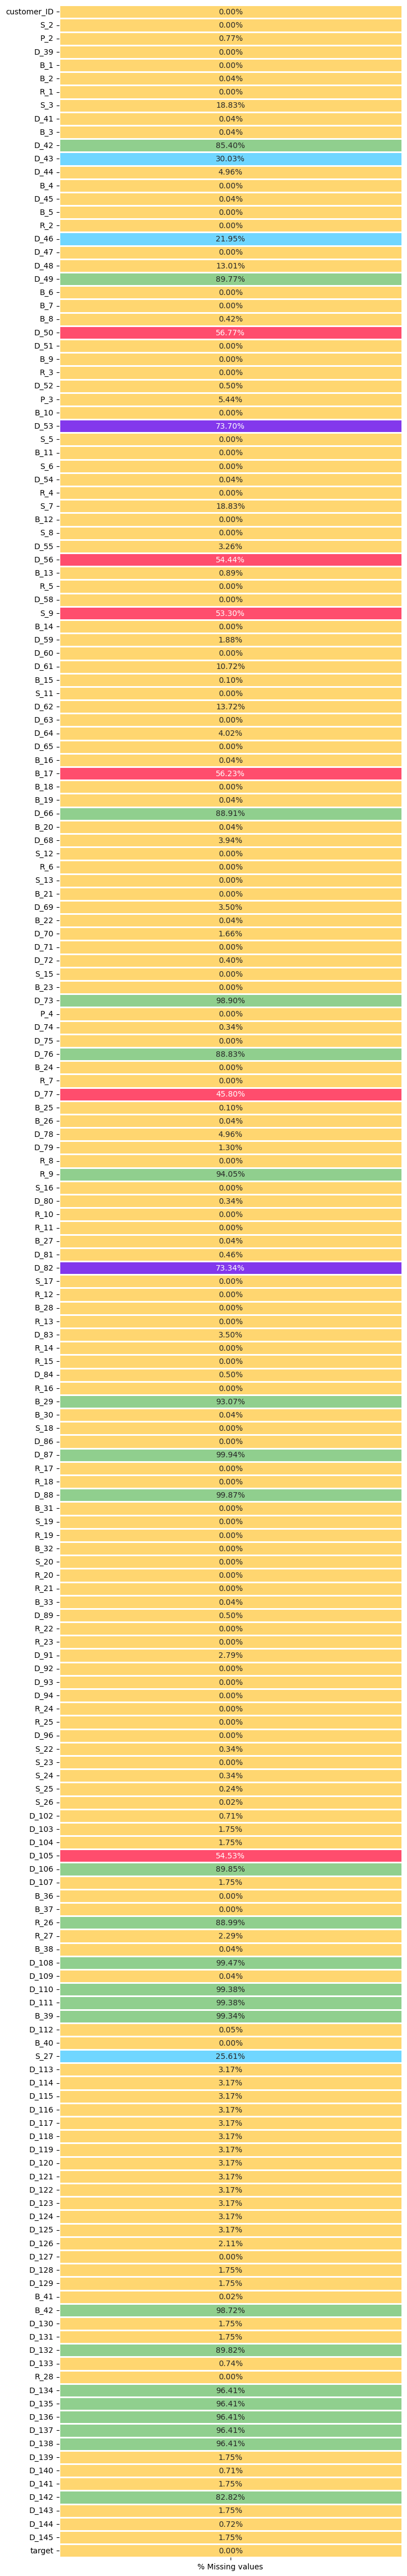

In [23]:
background_color = 'white'
missing = pd.DataFrame(columns = ['% Missing values'],data = df_train.isnull().sum()/len(df_train))
fig = plt.figure(figsize = (20, 60),facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
sns.heatmap(missing,cbar = False,annot = True,fmt =".2%", linewidths = 2,cmap = custom_colors,vmax = 1, ax = ax0)
plt.show()

In [24]:
df_train = df_train.groupby('customer_ID').tail(1).set_index('customer_ID')

In [25]:
feat_Delinquency = [c for c in df_train.columns if c.startswith('D_')]
feat_Spend = [c for c in df_train.columns if c.startswith('S_')]
feat_Payment = [c for c in df_train.columns if c.startswith('P_')]
feat_Balance = [c for c in df_train.columns if c.startswith('B_')]
feat_Risk = [c for c in df_train.columns if c.startswith('R_')]

In [26]:
print(f'Total number of Delinquency variables: {len(feat_Delinquency)}')
print(f'Total number of Spend variables: {len(feat_Spend)}')
print(f'Total number of Payment variables: {len(feat_Payment)}')
print(f'Total number of Balance variables: {len(feat_Balance)}')
print(f'Total number of Risk variables: {len(feat_Risk)}')

Total number of Delinquency variables: 96
Total number of Spend variables: 22
Total number of Payment variables: 3
Total number of Balance variables: 40
Total number of Risk variables: 28


In [27]:
labels=['Delinquency', 'Spend','Payment','Balance','Risk']
values= [len(feat_Delinquency), len(feat_Spend),len(feat_Payment), len(feat_Balance),len(feat_Risk)]

In [28]:
import plotly.graph_objects as go
import plotly.express as px
from itertools import cycle

In [29]:
fig_1 = go.Figure()
fig_1.add_trace(go.Pie(values = values,labels = labels,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig_1.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#70d6ff","#ff9770"]),
                  title = dict(text = 'Feature Distribution'))  
fig_1.show()

In [30]:
df_train['target'].unique()

array([0, 1])

In [31]:
df_train['target'].value_counts()

0    12188
1     4388
Name: target, dtype: int64

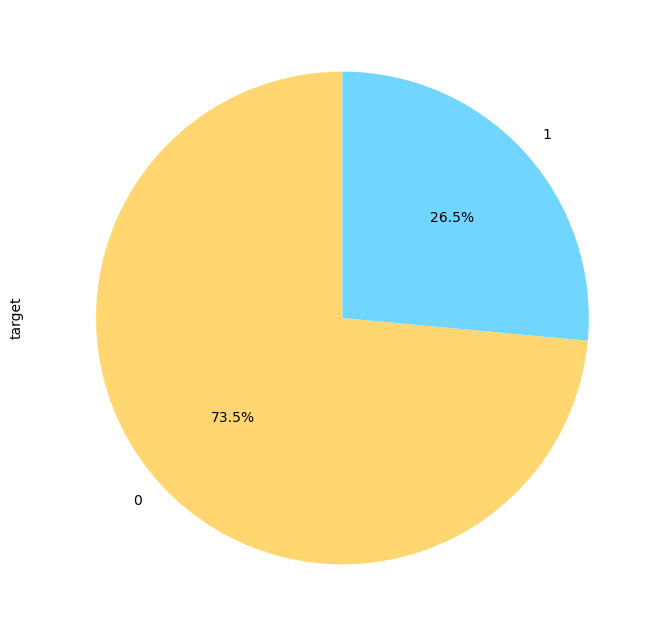

In [35]:
plt.figure(figsize=(20,8))
df_train['target'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', startangle=90)
plt.xticks(rotation = 90)
plt.show()

In [36]:
target_class = pd.DataFrame({'count': df_train.target.value_counts(),
                             'percentage': df_train['target'].value_counts() / df_train.shape[0] * 100
})

In [37]:
target_class 

count  percentage
0  12188   73.527992
1   4388   26.472008

In [38]:
fig = go.Figure()
fig.add_trace(go.Pie(values = target_class['count'],labels = target_class.index,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#90cf8e","#ff70a6"]),
                  title = dict(text = 'Target Distribution'))  
fig.show()

In [39]:
stat_plot = df_train.reset_index().groupby('S_2')['customer_ID'].nunique().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x = stat_plot['S_2'], y = stat_plot['customer_ID']))
fig.update_layout(title="Customer Statements", width = 800, height = 600,xaxis_title ='Statement Date',
                  paper_bgcolor='rgb(0,0,0,0)',plot_bgcolor='rgb(0,0,0,0)') 
fig['data'][0]['line']['color']="#ff9770"
fig.show()

In [40]:
import gc

In [41]:
gc.collect()

5724

In [42]:
df_train = df_train.drop('S_2', axis = 1)

In [43]:
del_cols = [c for c in df_train.columns if (c.startswith(('D','t'))) & (c not in cat_cols)]
df_del = df_train[del_cols]
spd_cols = [c for c in df_train.columns if (c.startswith(('S','t'))) & (c not in cat_cols)]
df_spd = df_train[spd_cols]
pay_cols = [c for c in df_train.columns if (c.startswith(('P','t'))) & (c not in cat_cols)]
df_pay = df_train[pay_cols]
bal_cols = [c for c in df_train.columns if (c.startswith(('B','t'))) & (c not in cat_cols)]
df_bal = df_train[bal_cols]
ris_cols = [c for c in df_train.columns if (c.startswith(('R','t'))) & (c not in cat_cols)]
df_ris = df_train[ris_cols]

In [44]:
fig, axes = plt.subplots(29, 3, figsize = (35,150))
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(del_cols) - 1:
        sns.kdeplot(x = del_cols[i], hue='target', data = df_del, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
fig.suptitle('Distribution of Delinquency Variables', fontsize = 35, x = 0.5, y = 1)
plt.tight_layout()
plt.show()

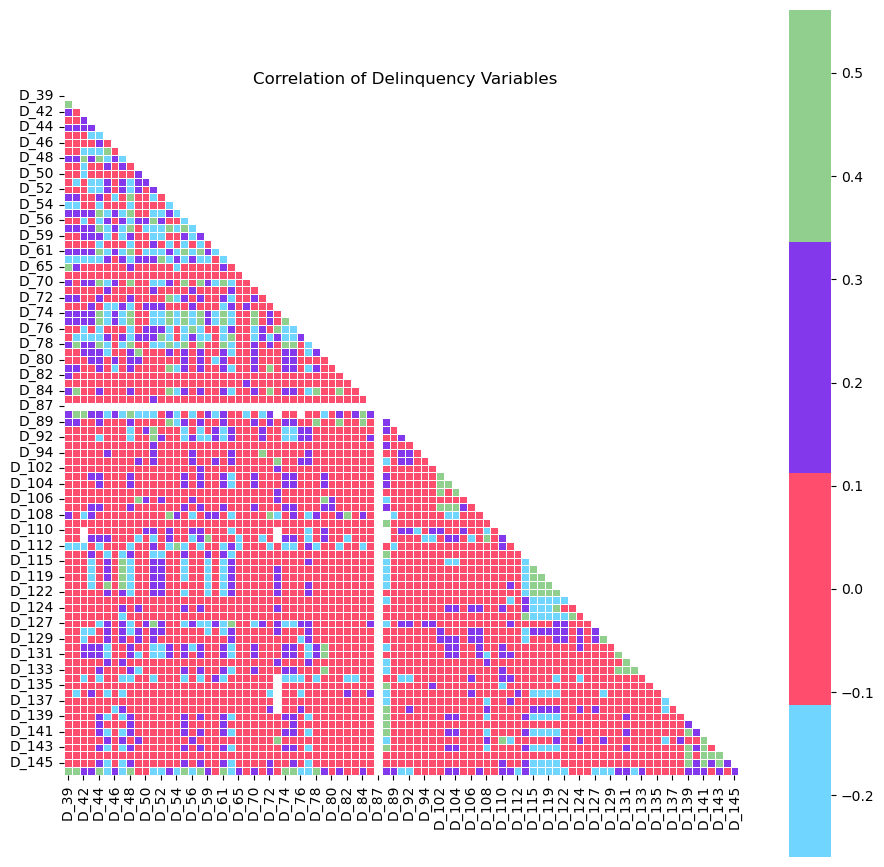

In [45]:
plt.figure(figsize =(11,11))
corr = df_del.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Delinquency Variables')
plt.show()

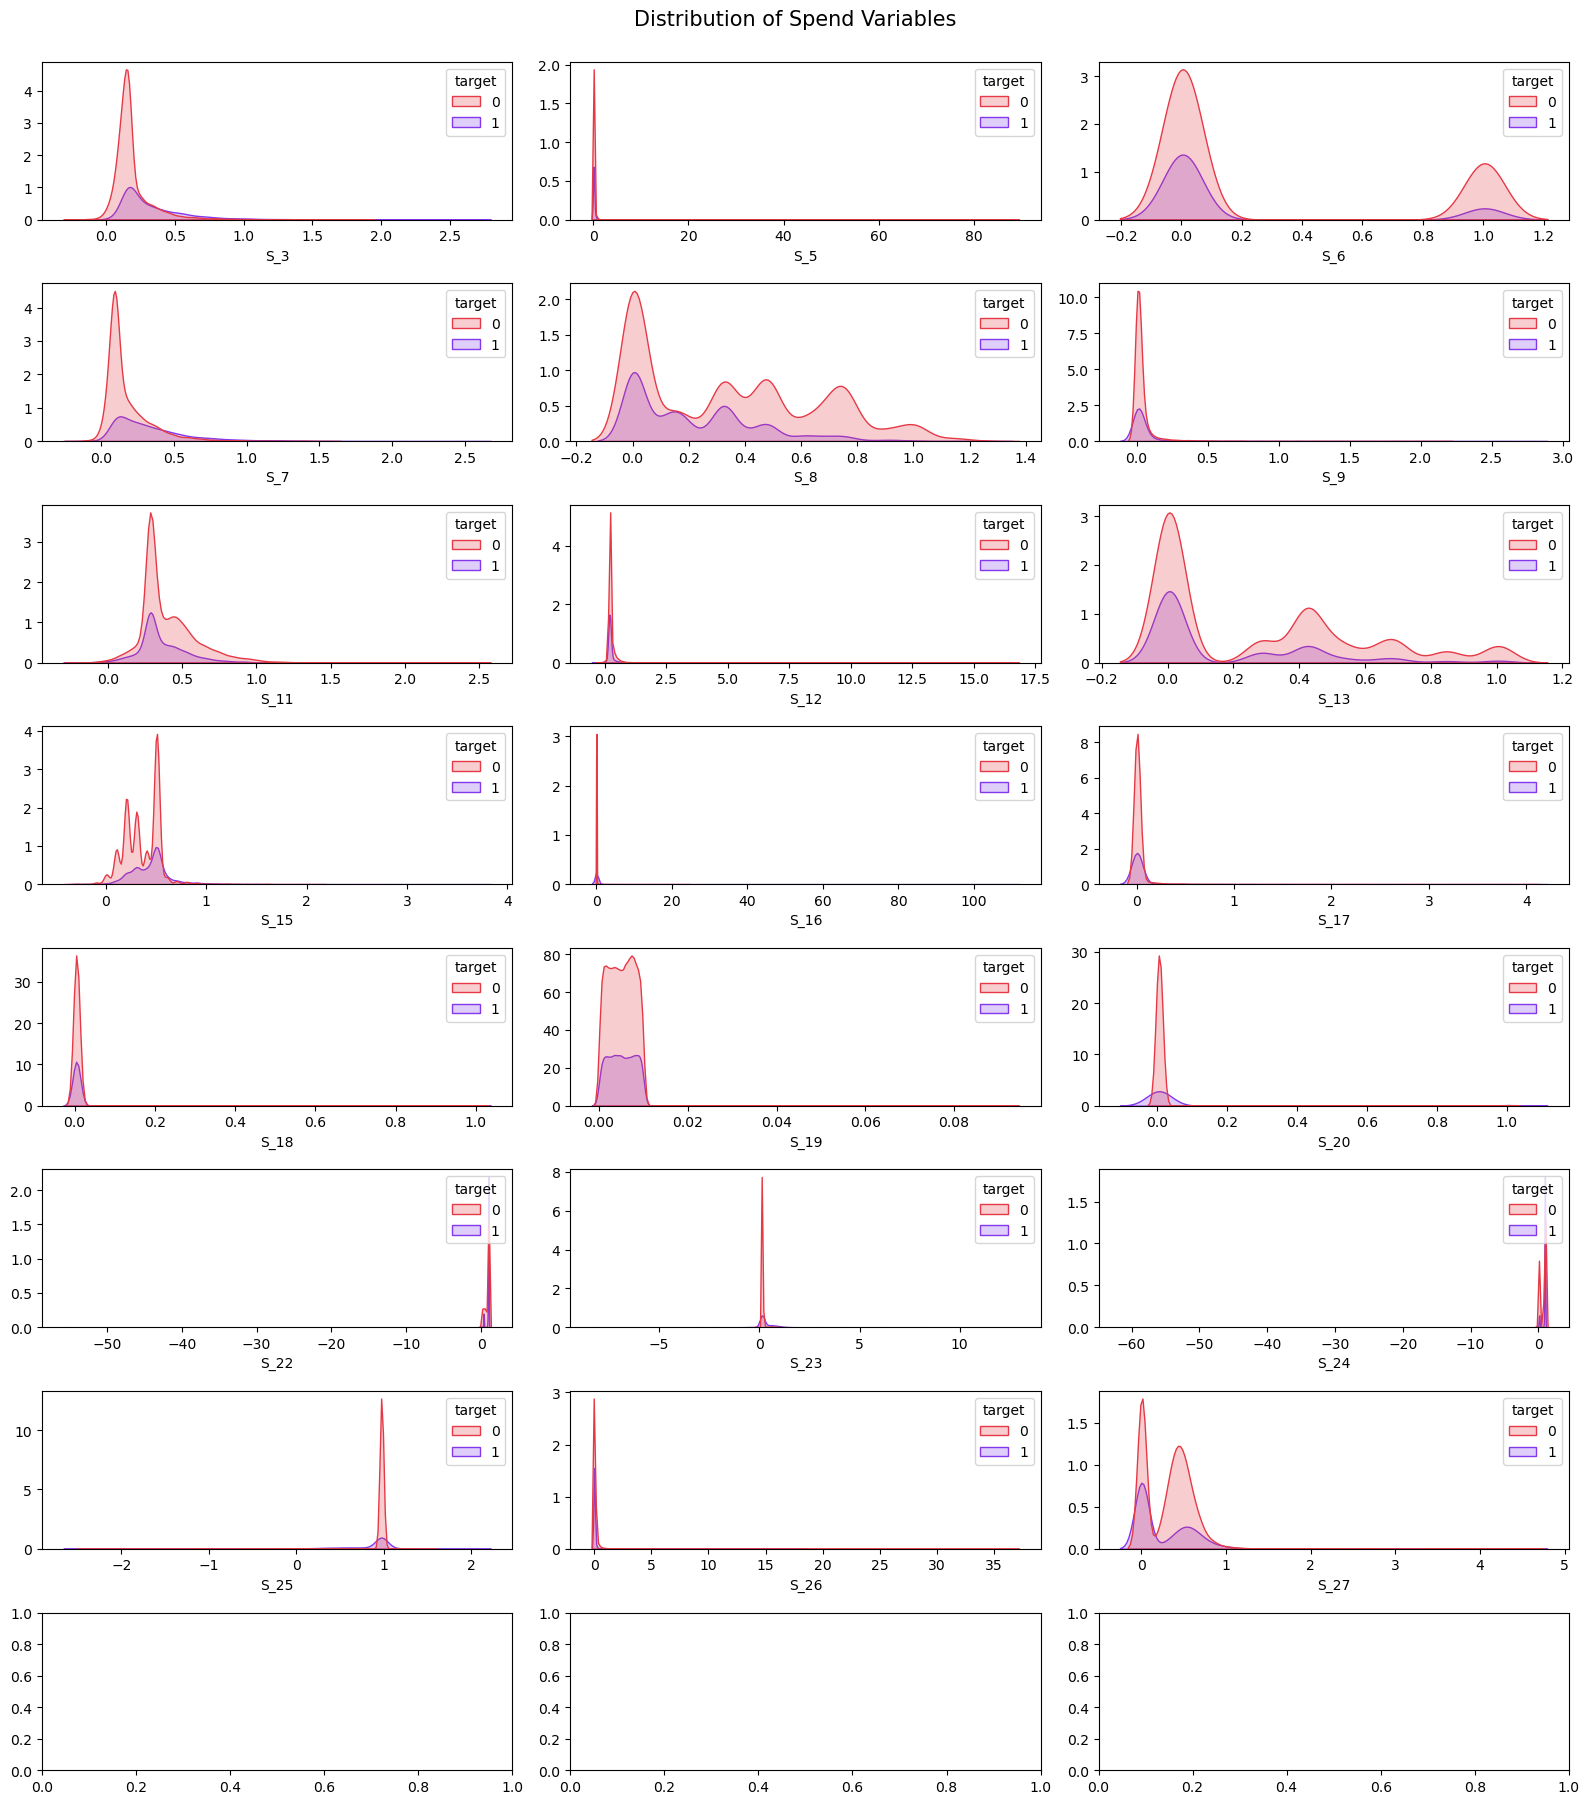

In [46]:
fig, axes = plt.subplots(8, 3, figsize = (16,18))
fig.suptitle('Distribution of Spend Variables', fontsize = 15, x = 0.5, y = 1)
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(spd_cols) - 1:
        sns.kdeplot(x = spd_cols[i], hue ='target', data = df_spd, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [47]:
S_cols = [c for c in df_train.columns if (c.startswith(('S')))]
df_S = df_train[S_cols]

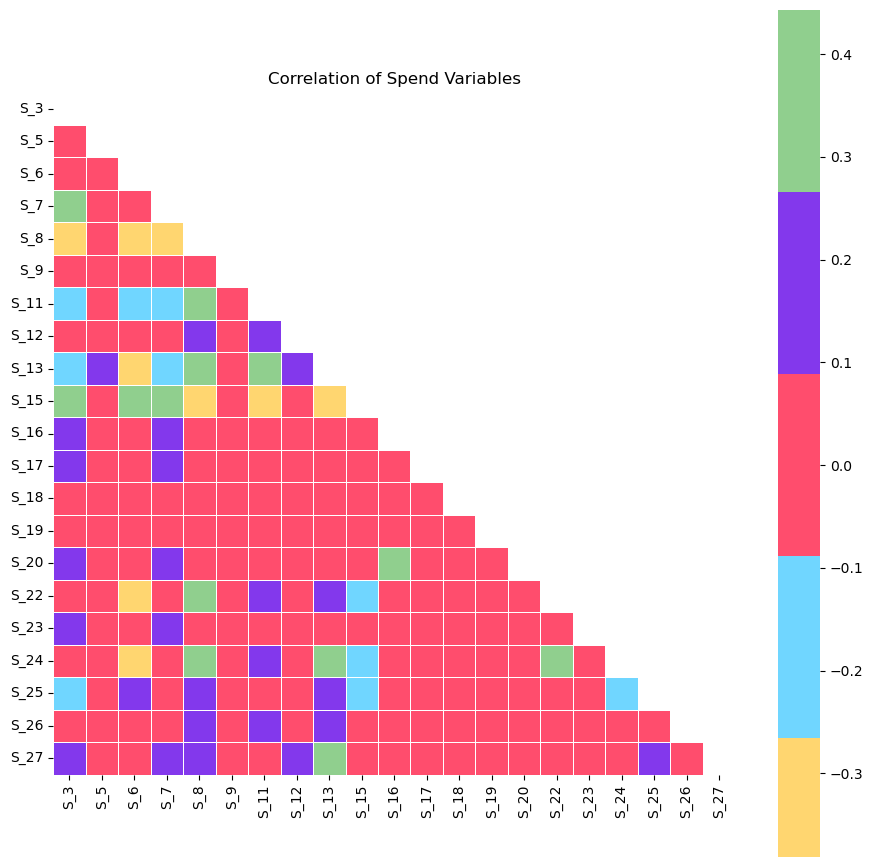

In [48]:
plt.figure(figsize = (11,11))
corr = df_S.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths = .6, cmap = custom_colors)
plt.title('Correlation of Spend Variables')
plt.show()

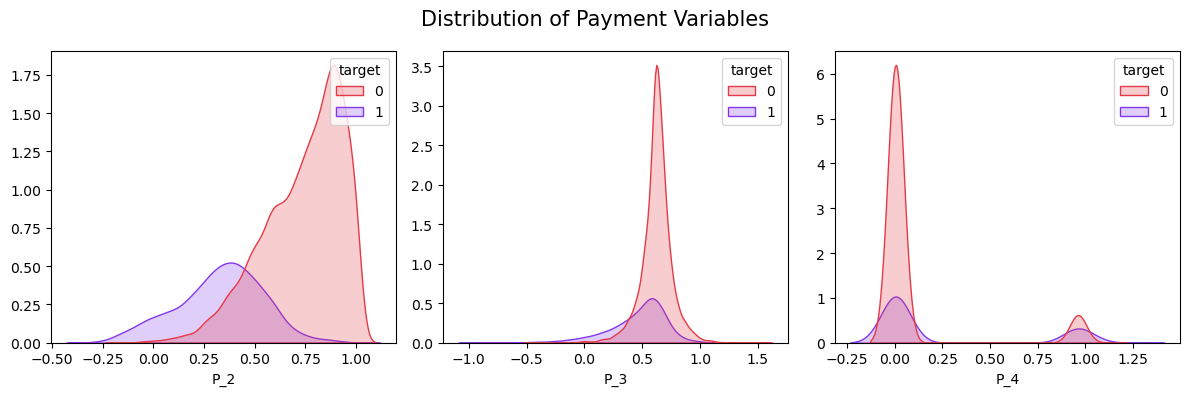

In [50]:
fig, axes = plt.subplots(1, 3, figsize = (12,4))
fig.suptitle('Distribution of Payment Variables',fontsize = 15)
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(pay_cols) - 1:
        sns.kdeplot(x = pay_cols[i], hue ='target', data = df_pay, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [51]:
P_cols = [c for c in df_train.columns if (c.startswith(('P')))]
df_P = df_train[P_cols]

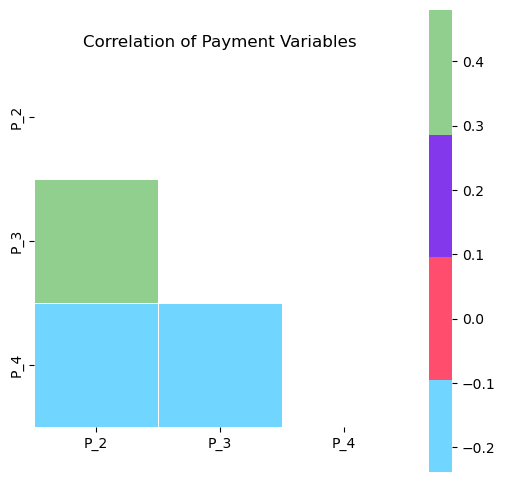

In [52]:
plt.figure(figsize = (6,6))
corr = df_P.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths = .6, cmap = custom_colors)
plt.title('Correlation of Payment Variables')
plt.show()

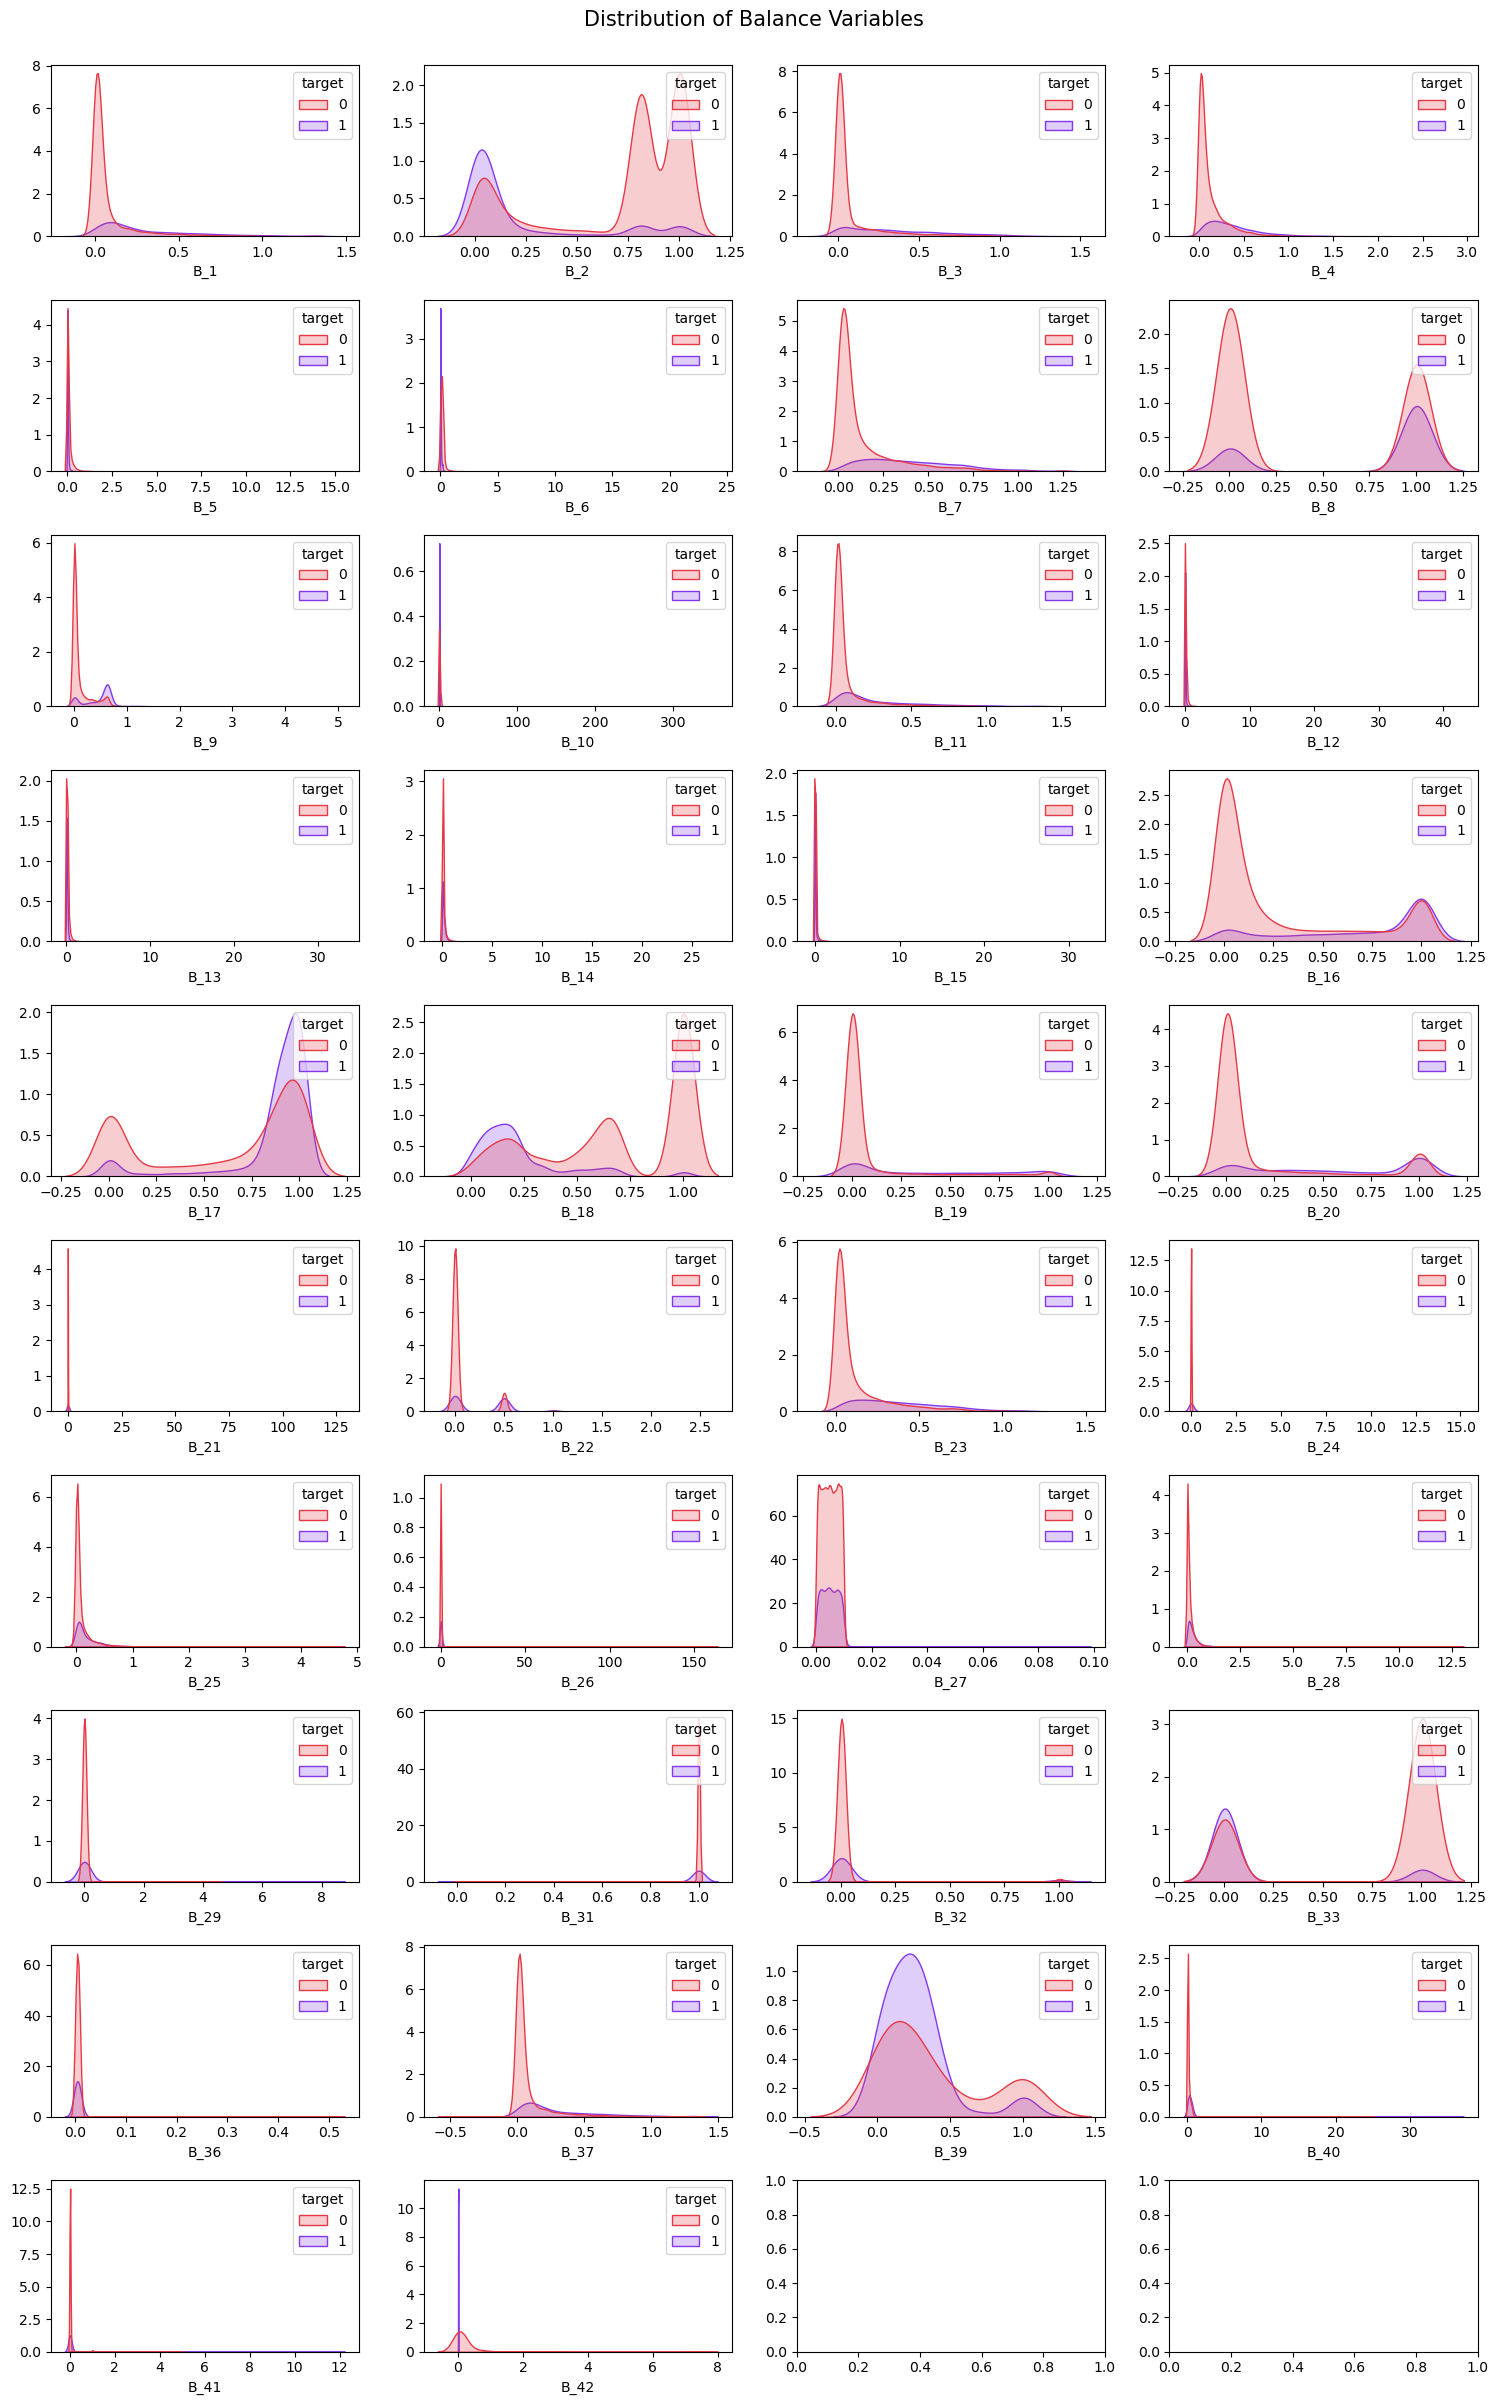

In [53]:
fig, axes = plt.subplots(10, 4, figsize = (15,24))
fig.suptitle('Distribution of Balance Variables',fontsize = 15, x = 0.5, y = 1)
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(bal_cols) - 1:
        sns.kdeplot(x = bal_cols[i], hue ='target', data = df_bal, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [54]:
B_cols = [c for c in df_train.columns if (c.startswith(('B')))]
df_B = df_train[B_cols]

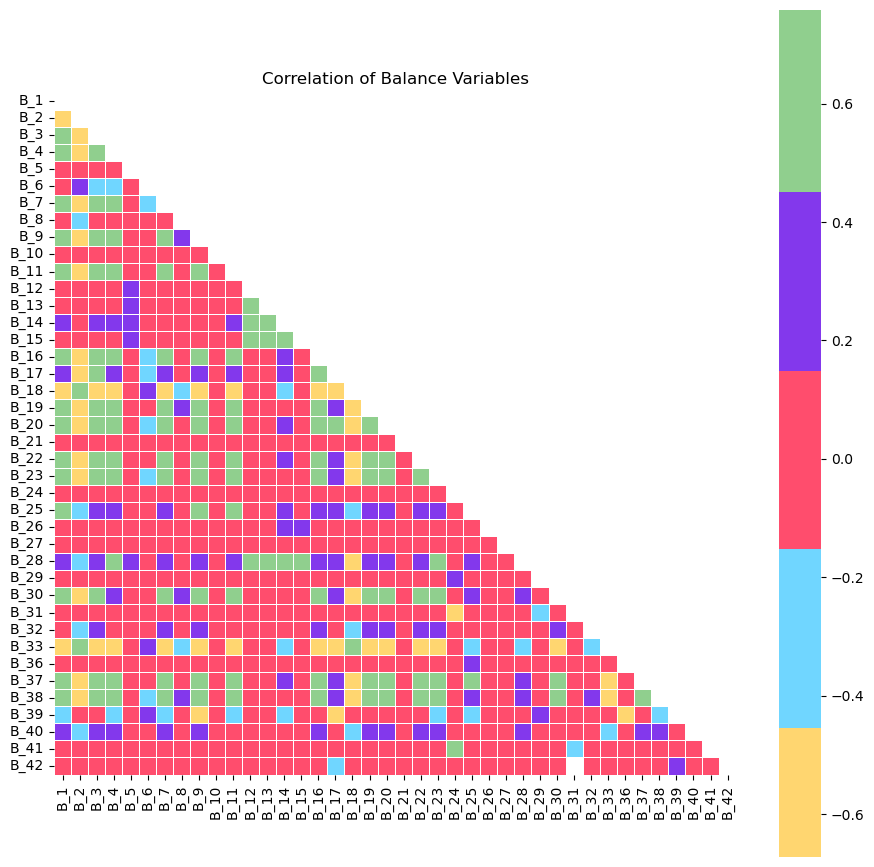

In [55]:
plt.figure(figsize = (11,11))
corr = df_B.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust=True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Balance Variables')
plt.show()

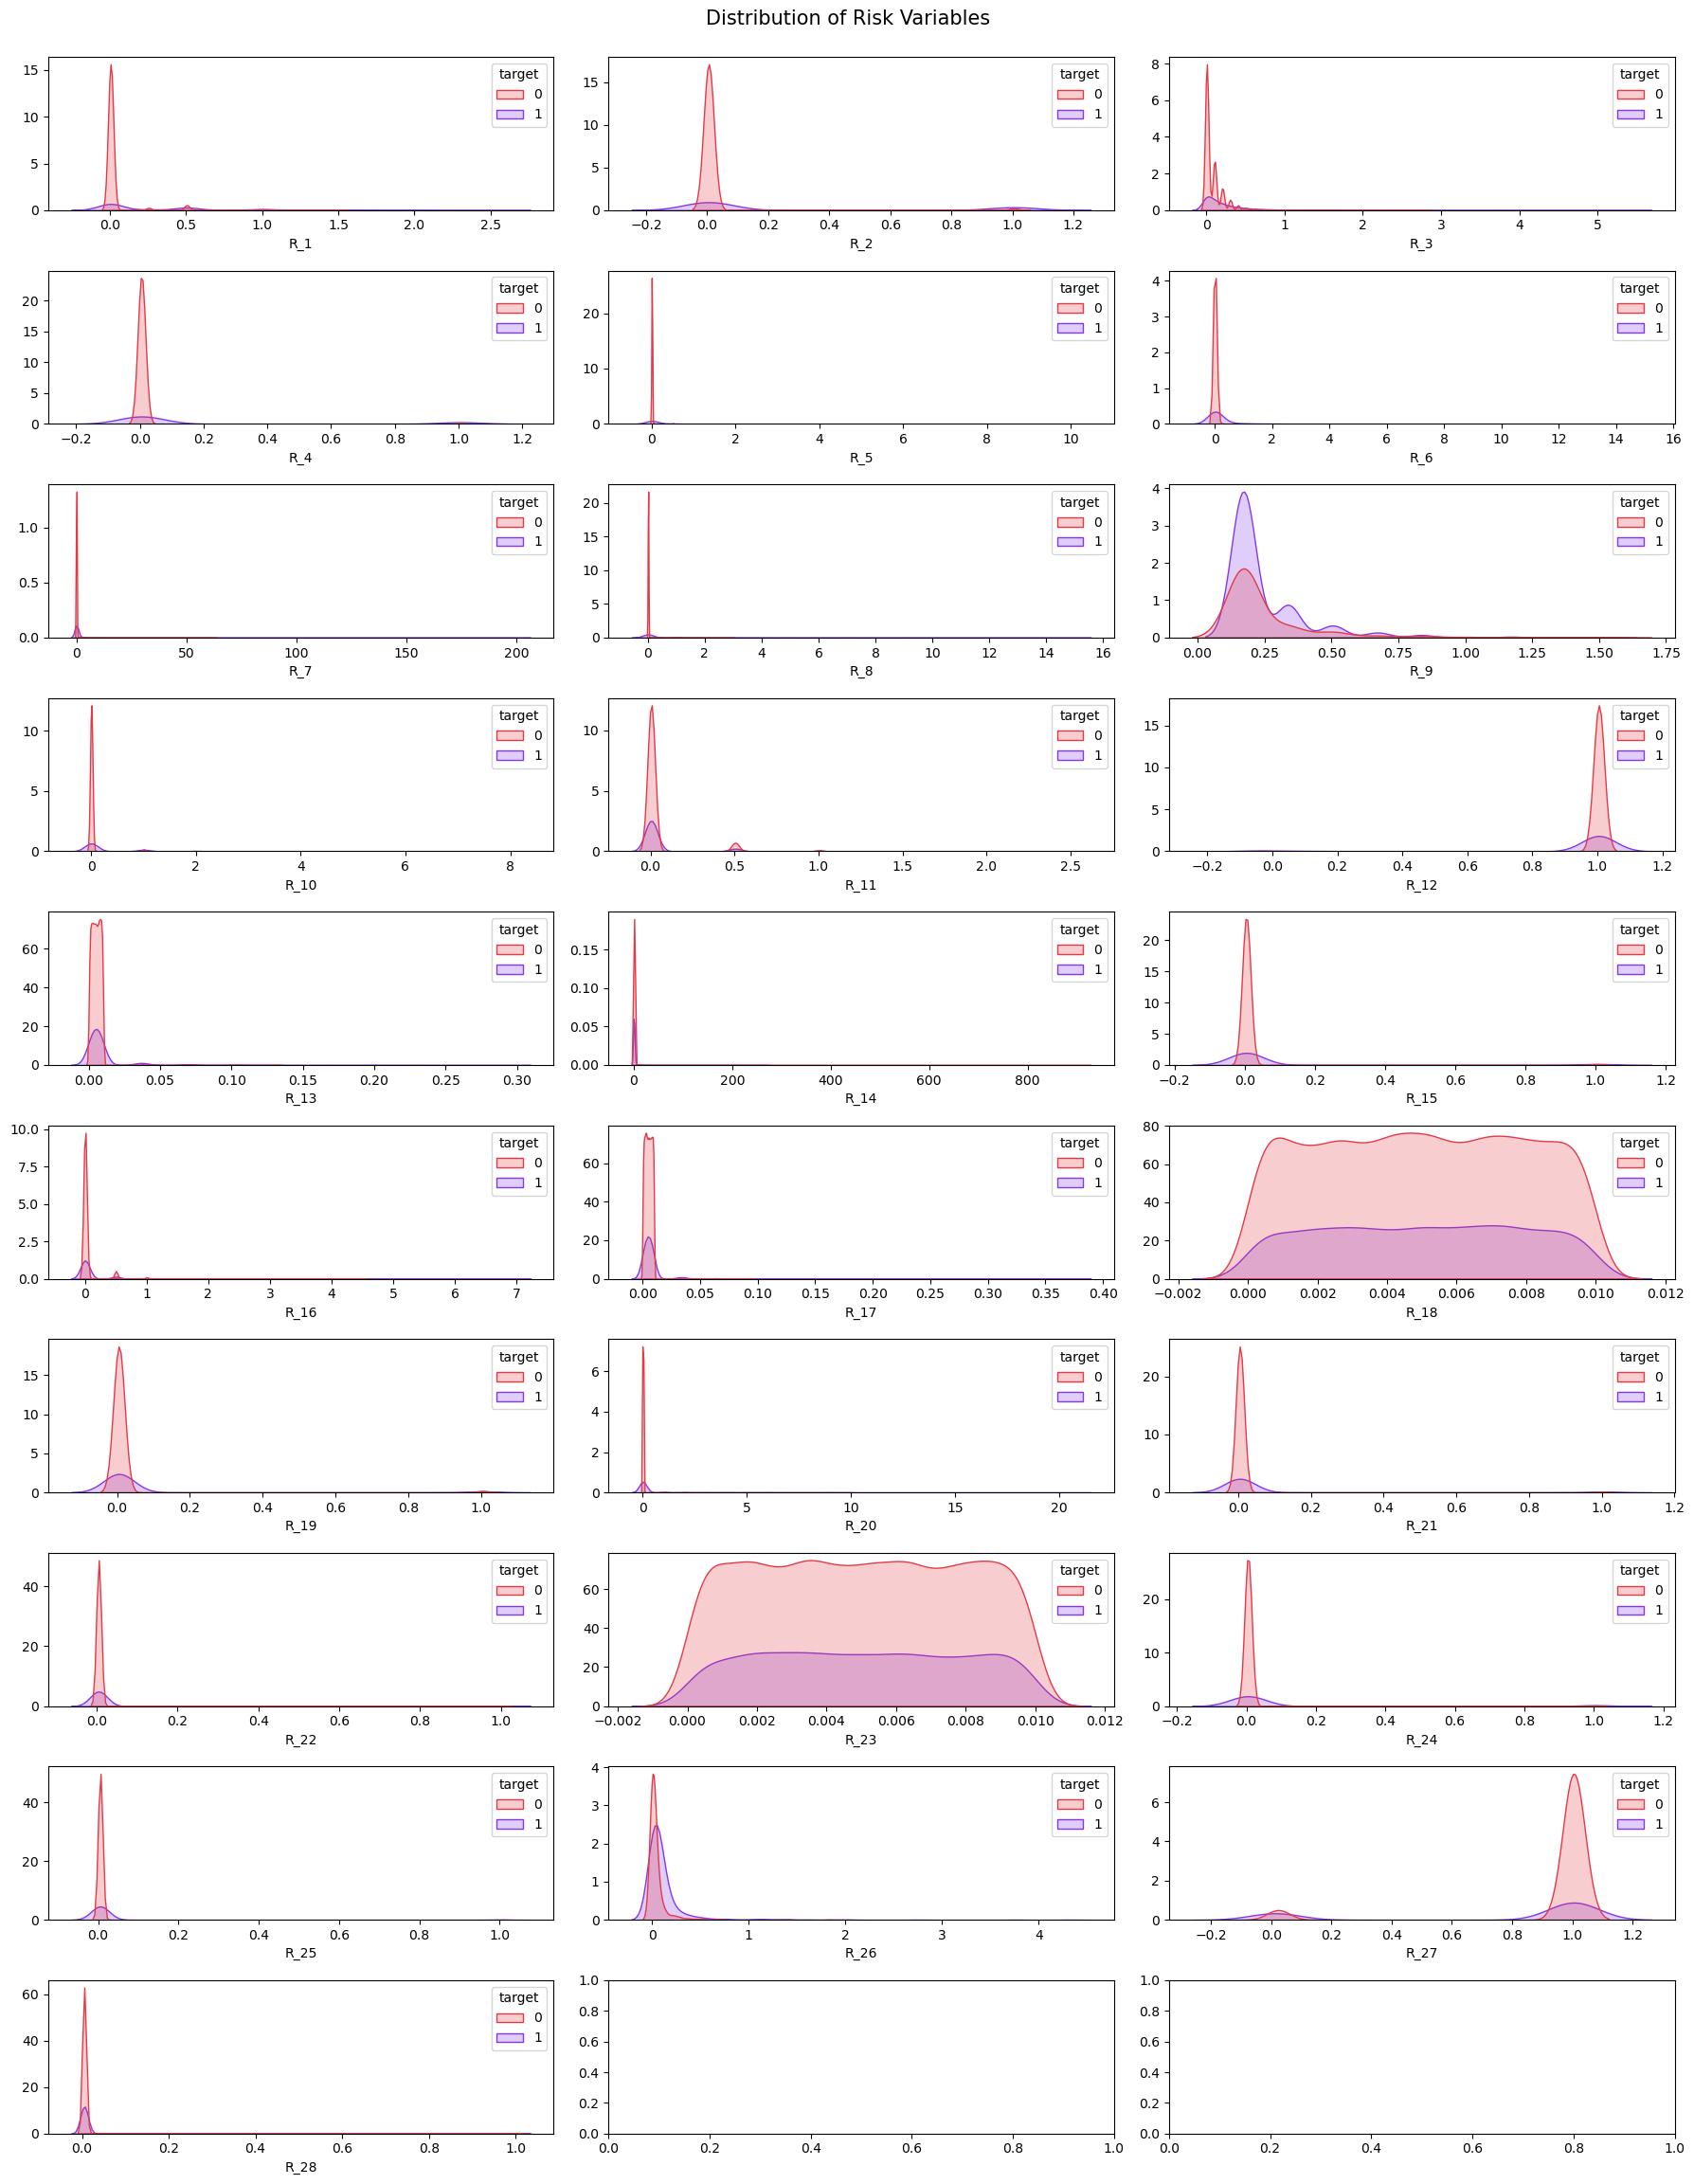

In [56]:
fig, axes = plt.subplots(10, 3, figsize = (18,23))
fig.suptitle('Distribution of Risk Variables',fontsize=15, x = 0.5, y = 1)
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(ris_cols) - 1:
        sns.kdeplot(x = ris_cols[i], hue ='target', data = df_ris, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [57]:
R_cols = [c for c in df_train.columns if (c.startswith(('R')))]
df_R = df_train[R_cols]

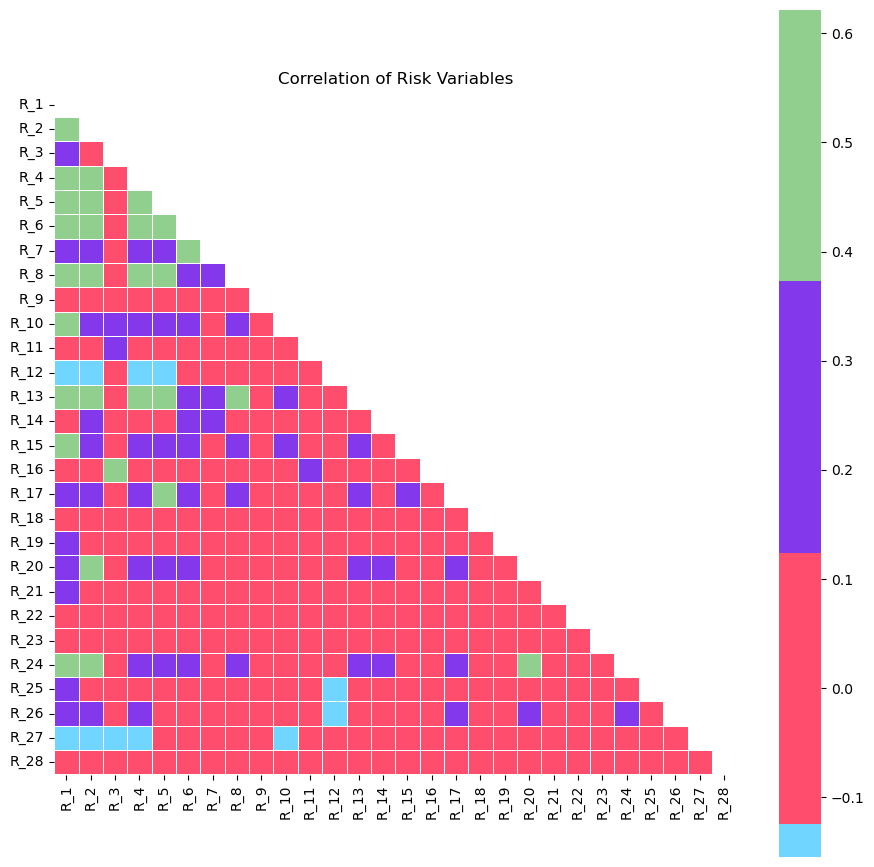

In [58]:
plt.figure(figsize=(11,11))
corr = df_R.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0, square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Risk Variables')
plt.show()

In [59]:
palette = cycle(["#ffd670","#70d6ff","#ff4d6d","#8338ec","#90cf8e"])
targ = df_train.corrwith(df_train['target'], axis=0)
val = [str(round(v ,1) *100) + '%' for v in targ.values]
fig = go.Figure()
fig.add_trace(go.Bar(y=targ.index, x= targ.values, orientation='h',text = val, marker_color = next(palette)))
fig.update_layout(title = "Correlation of variables with Target",width = 750, height = 3500,
                  paper_bgcolor='rgb(0,0,0,0)',plot_bgcolor='rgb(0,0,0,0)')

In [60]:
gc.collect()

128090

In [61]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for cat_feat in cat_cols:
    df_train[cat_feat] = lab_enc.fit_transform(df_train[cat_feat])

In [62]:
X = df_train.drop('target', axis=1)
y = df_train['target']

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16576 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to 09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5a2d1e1a4a474ab5382
Columns: 188 entries, P_2 to D_145
dtypes: float64(176), int64(12)
memory usage: 24.4+ MB


In [64]:
X.shape

(16576, 188)

In [65]:
y.shape

(16576,)

In [66]:
from sklearn.model_selection import train_test_split

# creating dataset split for prediction
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (13260, 188)
y_train: (13260,)
X_test: (3316, 188)
y_test: (3316,)


In [67]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations = 3000, random_state = 42)
clf.fit(X_train, y_train, eval_set = [(X_test, y_test)], cat_features=cat_cols,  verbose = 100)
preds = clf.predict_proba(X_test)[:, 1]

Learning rate set to 0.037207
0:	learn: 0.6544311	test: 0.6549397	best: 0.6549397 (0)	total: 131ms	remaining: 6m 33s
100:	learn: 0.2280403	test: 0.2507311	best: 0.2507311 (100)	total: 6.19s	remaining: 2m 57s
200:	learn: 0.2026208	test: 0.2433350	best: 0.2433206 (199)	total: 12.1s	remaining: 2m 48s
300:	learn: 0.1832475	test: 0.2404938	best: 0.2404938 (300)	total: 18.1s	remaining: 2m 42s
400:	learn: 0.1643315	test: 0.2400258	best: 0.2398588 (367)	total: 24.4s	remaining: 2m 38s
500:	learn: 0.1485042	test: 0.2392565	best: 0.2391489 (489)	total: 30.3s	remaining: 2m 30s
600:	learn: 0.1335790	test: 0.2389479	best: 0.2387805 (589)	total: 36.1s	remaining: 2m 24s
700:	learn: 0.1203103	test: 0.2397433	best: 0.2387805 (589)	total: 42s	remaining: 2m 17s
800:	learn: 0.1094683	test: 0.2399599	best: 0.2387805 (589)	total: 47.8s	remaining: 2m 11s
900:	learn: 0.0997237	test: 0.2404169	best: 0.2387805 (589)	total: 54.1s	remaining: 2m 5s
1000:	learn: 0.0910599	test: 0.2405846	best: 0.2387805 (589)	total:

In [71]:
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train) 

In [77]:
from sklearn.metrics import accuracy_score,recall_score

In [75]:
print(f"Accuracy of train data :{accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy of test data :{accuracy_score(y_test, y_pred)}")

Accuracy of train data :0.9618401206636501
Accuracy of test data :0.8914354644149578


In [78]:
print(f"Recall train data :{recall_score(y_train, y_train_pred)}")
print(f"Recall of test data :{recall_score(y_test, y_pred)}")

Recall train data :0.9111990950226244
Recall of test data :0.789906103286385


In [79]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)

In [80]:
cm

array([[2283,  181],
       [ 179,  673]])

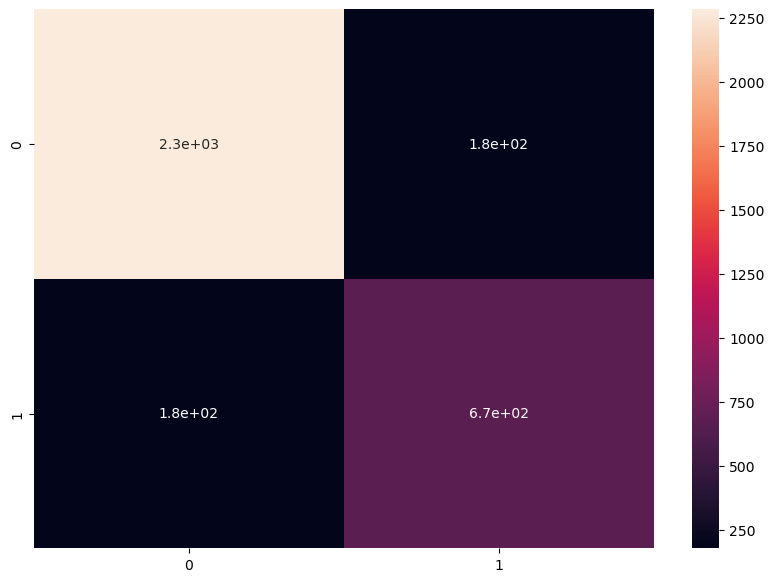

In [81]:
plt.figure(figsize=[10,7],)
sns.heatmap(cm, annot = True)
plt.show()

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2464
           1       0.79      0.79      0.79       852

    accuracy                           0.89      3316
   macro avg       0.86      0.86      0.86      3316
weighted avg       0.89      0.89      0.89      3316



In [83]:
threshold = 0.8
df_train = df_train.drop(df_train.columns[df_train.isnull().mean() >= threshold], axis=1)

In [84]:
df_train.head()

P_2      D_39  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.934745  0.009119   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.880519  0.178126   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.880875  0.009704   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.621776  0.001083   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.871900  0.005573   

                                                         B_1       B_2  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.009382  1.007647   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.034684  1.004028   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.004284  0.812650   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.012564  1.006183   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.007679  0.815746   

                                                         R_1       S_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.006104  0.135021   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.006911  0.165509   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006450       NaN   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.007829  0.287766   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.001247       NaN   

                                                        D_41       B_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.001604  0.007174   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.005552  0.005068   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.003796  0.007196   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.004532  0.009937   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.000231  0.005528   

                                                        D_43      D_44  ...  \
customer_ID                                                             ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...       NaN  0.003258  ...   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.060646  0.008781  ...   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...       NaN  0.000628  ...   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.046104  0.007792  ...   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.044671  0.002436  ...   

                                                       D_131     D_133  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005702  0.006210   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.001928  0.002996   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.003470  0.009881   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.004576  0.001789   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.008897  0.005045   

                                                        R_28     D_139  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.002715  0.007186   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.001701  0.002980   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.007691  0.007383   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.005140  0.002704   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.003706  0.002974   

                                                       D_140     D_141  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.004234  0.005086   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.007479  0.007870   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006623  0.000964   
000041bdba6ecadd89a

In [85]:
df_train.shape

(16576, 167)

In [86]:
df_train.columns

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_43',
       'D_44',
       ...
       'D_131', 'D_133', 'R_28', 'D_139', 'D_140', 'D_141', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=167)

In [87]:
df_train.duplicated().sum()

0

In [88]:
df_train.isnull().sum()

P_2       106
D_39        0
B_1         0
B_2         1
R_1         0
         ... 
D_141      94
D_143      94
D_144       0
D_145      94
target      0
Length: 167, dtype: int64

In [89]:
df_train = df_train.fillna(0)

In [90]:
X = df_train.drop('target', axis=1)
y = df_train['target']

In [91]:
X.shape

(16576, 166)

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.03727652 0.0060843  0.00637976 0.03611255 0.01075383 0.00589761
 0.00897543 0.01092892 0.00682117 0.01907208 0.00546225 0.00527582
 0.00324794 0.02927101 0.00341377 0.00491047 0.02186808 0.00283118
 0.00975708 0.01800051 0.00241394 0.00423278 0.02050361 0.00601335
 0.00392136 0.00770169 0.00339934 0.00402884 0.00279963 0.00691027
 0.00294156 0.0101507  0.01145319 0.008472   0.00244692 0.00506715
 0.02034142 0.00254841 0.00260478 0.00461015 0.01237794 0.00260589
 0.00275366 0.00364436 0.00303518 0.01623401 0.00248016 0.00277352
 0.00371891 0.00191308 0.0037879  0.0033751  0.01430288 0.01424422
 0.02710795 0.01414581 0.00153654 0.01638459 0.00278662 0.00284013
 0.00363721 0.00466657 0.00299405 0.00301481 0.00762637 0.00395591
 0.00291056 0.00435405 0.00360794 0.00927907 0.00665826 0.00834119
 0.01078063 0.00323657 0.00296244 0.00372428 0.00284423 0.00288739
 0.00625474 0.00364707 0.003196   0.00300032 0.00269513 0.00797963
 0.00311246 0.00295918 0.00527015 0.00199645 0.0025276  0.0047

In [93]:
X = df_train.iloc[:,:-1]

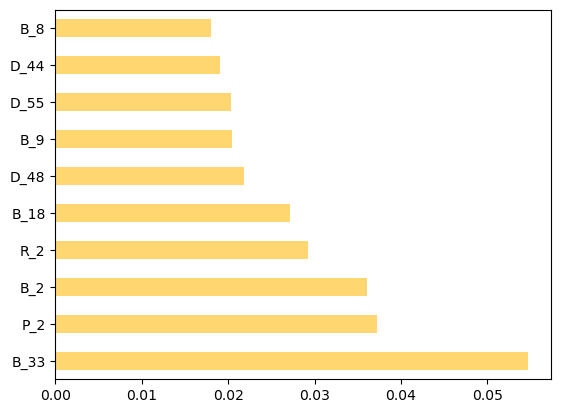

In [94]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [95]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (13260, 166)
y_train: (13260,)
X_test: (3316, 166)
y_test: (3316,)


In [96]:
from sklearn.linear_model import LogisticRegression  
log_r= LogisticRegression(random_state=0)  
log_r.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [100]:
y_pred_lr= log_r.predict(X_test)
y_train_pred_lr = log_r.predict(X_train)

In [101]:
print(f"Accuracy of train data :{accuracy_score(y_train, y_train_pred_lr)}")
print(f"Accuracy of test data :{accuracy_score(y_test, y_pred_lr)}")

Accuracy of train data :0.8956259426847663
Accuracy of test data :0.8869119420989143


In [103]:
print(f"Recall train data :{recall_score(y_train, y_train_pred_lr)}")
print(f"Recall of test data :{recall_score(y_test, y_pred_lr)}")

Recall train data :0.7805429864253394
Recall of test data :0.7652582159624414


In [106]:
cm = confusion_matrix(y_test, y_pred_lr)

In [107]:
cm

array([[2289,  175],
       [ 200,  652]])

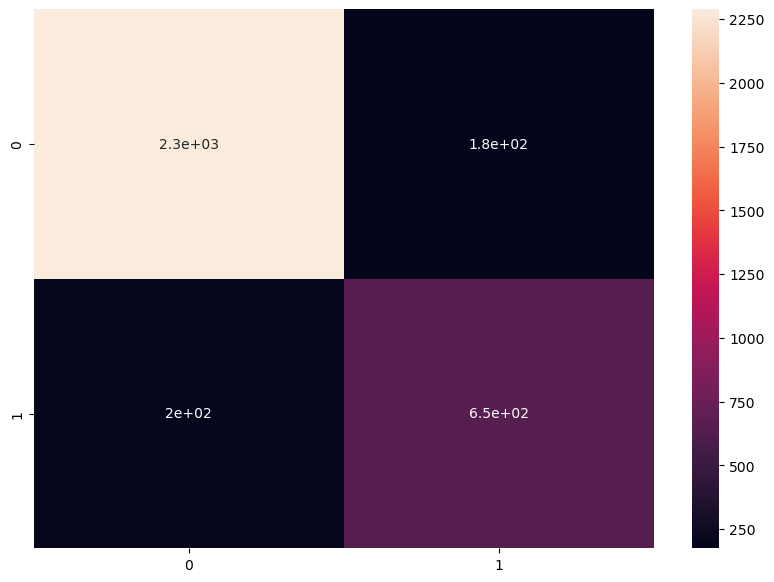

In [108]:
plt.figure(figsize=[10,7],)
sns.heatmap(cm, annot = True)
plt.show()

In [109]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2464
           1       0.79      0.77      0.78       852

    accuracy                           0.89      3316
   macro avg       0.85      0.85      0.85      3316
weighted avg       0.89      0.89      0.89      3316



In [110]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [117]:
y_pred_dt= dt.predict(X_test)
y_train_pred_dt = dt.predict(X_train)

In [119]:
print(f"Accuracy of train data :{accuracy_score(y_train, y_train_pred_dt)}")
print(f"Accuracy of test data :{accuracy_score(y_test, y_pred_dt)}")

Accuracy of train data :1.0
Accuracy of test data :0.8320265379975874


In [120]:
print(f"Recall train data :{recall_score(y_train, y_train_pred_dt)}")
print(f"Recall of test data :{recall_score(y_test, y_pred_dt)}")

Recall train data :1.0
Recall of test data :0.6960093896713615


In [121]:
cm = confusion_matrix(y_test, y_pred_dt)

In [122]:
cm

array([[2166,  298],
       [ 259,  593]])

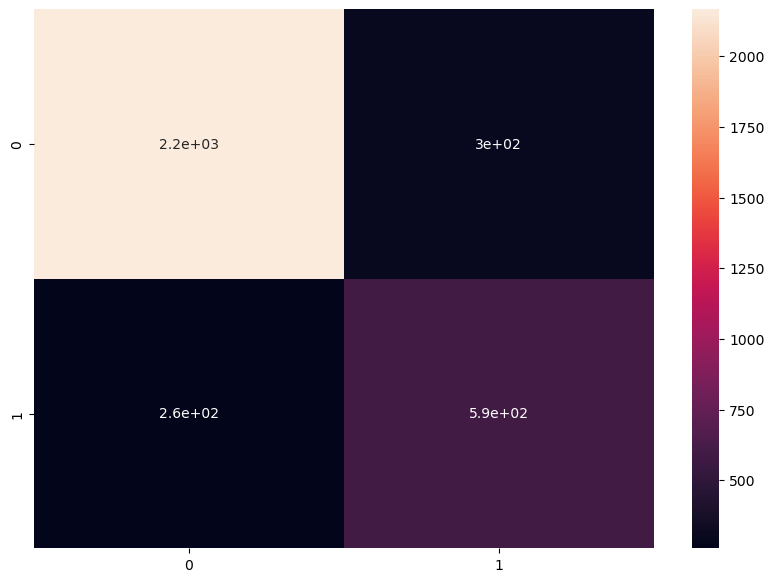

In [123]:
plt.figure(figsize=[10,7],)
sns.heatmap(cm, annot = True)
plt.show()

In [124]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2464
           1       0.67      0.70      0.68       852

    accuracy                           0.83      3316
   macro avg       0.78      0.79      0.78      3316
weighted avg       0.83      0.83      0.83      3316



In [125]:
from sklearn.ensemble import RandomForestClassifier  
rf_c = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf_c.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [127]:
y_pred_rf_c= rf_c.predict(X_test)  
y_train_pred_rfc = rf_c.predict(X_train)

In [128]:
print(f"Accuracy of train data :{accuracy_score(y_train, y_train_pred_rfc)}")
print(f"Accuracy of test data :{accuracy_score(y_test, y_pred_rf_c)}")

Accuracy of train data :0.9931372549019608
Accuracy of test data :0.8694209891435465


In [129]:
print(f"Recall train data :{recall_score(y_train, y_train_pred_rfc)}")
print(f"Recall of test data :{recall_score(y_test, y_pred_rf_c)}")

Recall train data :0.9790723981900452
Recall of test data :0.6983568075117371


In [131]:
cm= confusion_matrix(y_test, y_pred_rf_c) 

In [132]:
cm

array([[2288,  176],
       [ 257,  595]])

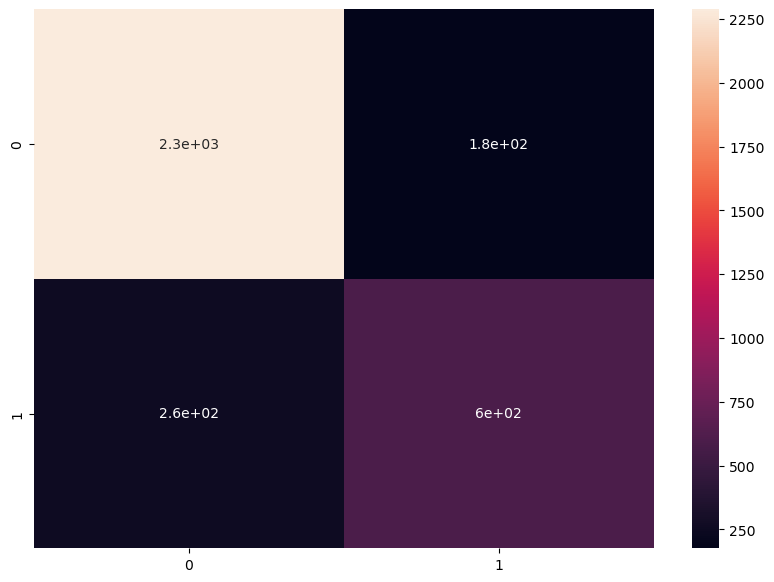

In [133]:
plt.figure(figsize=[10,7],)
sns.heatmap(cm, annot = True)
plt.show()

In [134]:
print(classification_report(y_test, y_pred_rf_c))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2464
           1       0.77      0.70      0.73       852

    accuracy                           0.87      3316
   macro avg       0.84      0.81      0.82      3316
weighted avg       0.87      0.87      0.87      3316



In [135]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [136]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)

In [137]:
def grid_search(model,folds,params,scoring):
    grid_search = GridSearchCV(model,
                                cv=folds, 
                                param_grid=params, 
                                scoring=scoring, 
                                n_jobs=-1, verbose=1)
    return grid_search

In [138]:
def print_best_score_params(model):
    print("Best Score: ", model.best_score_)
    print("Best Hyperparameters: ", model.best_params_)

In [140]:
log_reg = LogisticRegression()
log_params = {'C': [0.01, 1, 10], 
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear','newton-cg','saga']
         }
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)
grid_search_log.fit(X_train, y_train)
print_best_score_params(grid_search_log)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Score:  0.8911764705882353
Best Hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [146]:
from sklearn.linear_model import LogisticRegression  
log_r= LogisticRegression(C= 1,penalty='l1',solver='liblinear')  
log_r.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [147]:
y_pred_lr= log_r.predict(X_test)
y_train_pred_lr = log_r.predict(X_train)

In [148]:
print(f"Accuracy of train data :{accuracy_score(y_train, y_train_pred_lr)}")
print(f"Accuracy of test data :{accuracy_score(y_test, y_pred_lr)}")

Accuracy of train data :0.894947209653092
Accuracy of test data :0.8844993968636912


In [149]:
print(f"Recall train data :{recall_score(y_train, y_train_pred_lr)}")
print(f"Recall of test data :{recall_score(y_test, y_pred_lr)}")

Recall train data :0.7788461538461539
Recall of test data :0.7664319248826291


In [150]:
dtc = DecisionTreeClassifier(random_state=40)
dtc_params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20,30]
}
grid_search_dtc = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')
grid_search_dtc.fit(X_train, y_train)
print_best_score_params(grid_search_dtc)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Score:  0.9264288317374556
Best Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 10}


In [152]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

In [153]:
y_pred_dt= dt.predict(X_test)
y_train_pred_dt = dt.predict(X_train)

In [154]:
print(f"Accuracy of train data :{accuracy_score(y_train, y_train_pred_dt)}")
print(f"Accuracy of test data :{accuracy_score(y_test, y_pred_dt)}")	

Accuracy of train data :0.8809954751131222
Accuracy of test data :0.8501206272617612


In [155]:
print(f"Recall train data :{recall_score(y_train, y_train_pred_dt)}")
print(f"Recall of test data :{recall_score(y_test, y_pred_dt)}")

Recall train data :0.8099547511312217
Recall of test data :0.778169014084507


In [156]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [157]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
415/415 [==============================] - 2s 2ms/step - loss: 0.2874 - accuracy: 0.8767
Epoch 2/20
415/415 [==============================] - 1s 2ms/step - loss: 0.2590 - accuracy: 0.8891
Epoch 3/20
415/415 [==============================] - 1s 2ms/step - loss: 0.2490 - accuracy: 0.8903
Epoch 4/20
415/415 [==============================] - 1s 2ms/step - loss: 0.2423 - accuracy: 0.8924
Epoch 5/20
415/415 [==============================] - 1s 2ms/step - loss: 0.2346 - accuracy: 0.8943
Epoch 6/20
415/415 [==============================] - 1s 2ms/step - loss: 0.2288 - accuracy: 0.8969
Epoch 7/20
415/415 [==============================] - 1s 2ms/step - loss: 0.2277 - accuracy: 0.8993
Epoch 8/20
415/415 [==============================] - 1s 2ms/step - loss: 0.2257 - accuracy: 0.8982
Epoch 9/20
415/415 [==============================] - 1s 2ms/step - loss: 0.2235 - accuracy: 0.8985
Epoch 10/20
415/415 [==============================] - 1s 2ms/step - loss: 0.2180 - accuracy: 0.9035

In [159]:
y_predt= model.predict(X_test)
y_train_pred = model.predict(X_train)

415/415 [==============================] - 1s 1ms/step
